In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib widget

This notebook demonstrates a fourier-transform based frequency analysis and filtering of a data series.

In [3]:
xmax = 10
num_points = 2**10 # 1024 -- fft fastest with 2**n
xs = np.linspace(0, xmax, num_points)

def f(x):
    amp = 1
    theta0, theta1, theta2 = map(lambda x: x*2*np.pi, [0.5, 1, 4])
    return amp*(np.sin(theta0*x) + np.sin(theta1*x) + np.sin(theta2*x)) 
    #return amp*(np.sin(theta1*x) + np.sin(theta2*x))

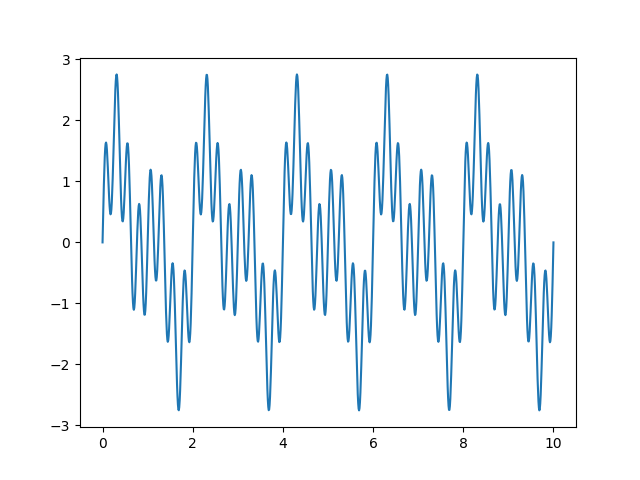

In [4]:
plt.figure('Example signal f(x)')
ax = plt.axes()
ax.plot(xs, f(xs))

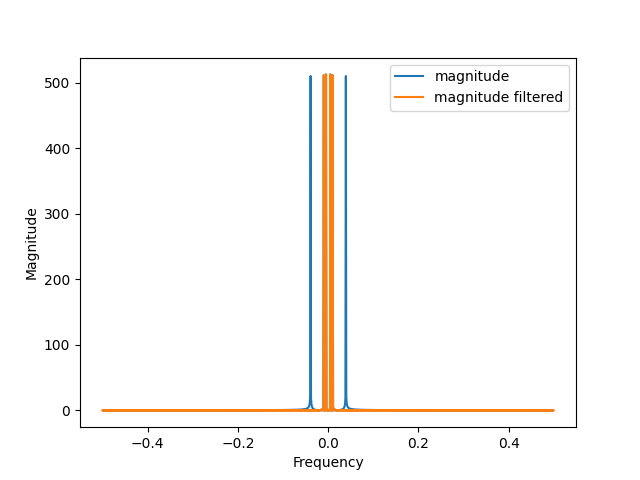

In [5]:
ys = f(xs)
ys_fft = np.fft.fft(ys)
freq = np.fft.fftfreq(xs.shape[-1])

#plt.figure('Real and imaginary parts of FFT in freq domain')
plt.figure('fft of f(x)')
ax = plt.axes()
#ax.plot(freq, ys_fft.real, label='real')
#ax.plot(freq, ys_fft.imag, label='imaginary')

ax.plot(freq, np.sqrt(ys_fft.real**2 + ys_fft.imag**2), label='magnitude')
#ax.plot(freq, np.abs(ys_fft), label='magnitude')
#ax.stem(freq, np.abs(ys_fft), 'b', \
#         markerfmt=" ", basefmt="-b",label='magnitude')

ax.set_xlabel('Frequency')
ax.set_ylabel('Magnitude')


#plot the fft with high frequencies filtered out
ys_fft_filtered = ys_fft.copy()
#ys_fft_filtered[np.abs(freq) < 0.0072] = 0 # removes lowest frequency noise
ys_fft_filtered[np.abs(freq) > 0.02] = 0 # removes highest frequency noise
ax.plot(freq, np.abs(ys_fft_filtered), label='magnitude filtered')

#ax.stem(freq, np.abs(ys_fft_filtered), 'r', \
#         markerfmt=" ", basefmt="-r",label='magnitude filtered')
ax.legend()


C:\Users\Max-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'f(x)')

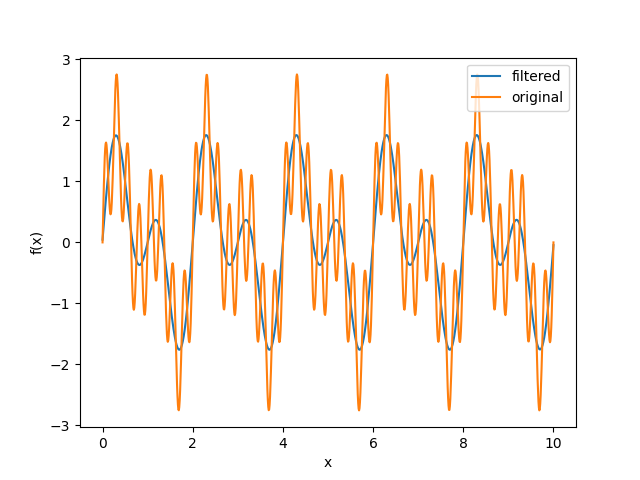

In [6]:
#plot the filtered signal and original signal reconstructed from fft
plt.figure('filtered signal')
ax = plt.axes()
ax.plot(xs, np.fft.ifft(ys_fft_filtered), label='filtered')
ax.plot(xs, np.fft.ifft(ys_fft), label='original')  
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

In [16]:
#calculate dominant frequencies
dominant_freqs = list(set(np.abs(freq[np.argsort(np.abs(ys_fft))[-6:]])*num_points/xmax))
print('Dominant frequencies:', *dominant_freqs)

dominant_freqs = list(set(np.abs(freq[np.argsort(np.abs(ys_fft_filtered))[-4:]])*num_points/xmax))
print('Dominant frequencies:', *dominant_freqs)

Dominant frequencies: 0.5 1.0 4.0
Dominant frequencies: 0.5 1.0
